In [2]:
import pandas as pd
import numpy as np
import glob
import plotly.express as px
import matplotlib.pyplot as plt
plt.style.use('default')
  
# %matplotlib inline: only draw static
# images in the notebookº
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Carga de información

In [3]:
laliga2122 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga21 22.xlsx', )
laliga2021 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga20 21.xlsx', )
laliga1920 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga19 20.xlsx', )
laliga1819 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga18 19.xlsx', )
laliga1718 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga17 18.xlsx', )
laliga1617 = pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga16 17.xlsx', )
seg2122 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 21 22.xlsx', )
seg2021 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 20 21.xlsx', )
seg1920 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 19 20.xlsx', )
seg1819 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC/MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 18 19.xlsx', )
seg1718 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC\MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 17 18.xlsx', )
seg1617 =  pd.read_excel('H:/Mi unidad/Diplomado - Introducción a la Ciencia de Datos UC\MANE - MCD - Análisis de datos en Phyton/Semana 3/LigasEspanolas6T/LaLiga123 16 17.xlsx', )


## Creando dataframes

In [4]:
import pandas as pd

# Concatenar los DataFrames de La Liga utilizando pd.concat
laliga = pd.concat([laliga2122, laliga2021, laliga1920, laliga1819, laliga1718, laliga1617], ignore_index=True)
laliga = laliga.dropna(how='all')
laliga = laliga.loc[:, ['Wk', 'Date', 'Local', 'Score', 'Visitante', 'Attendance']]
laliga['Attendance'] = laliga['Attendance'] * 1000
laliga['Torneo'] = 'Primera división'


In [5]:
partidos6t = pd.concat([laliga],axis = 0)
partidos6t

,Wk,Date,Local,Score,Visitante,Attendance,Torneo
0,1.0,2021-08-13,Valencia,1–0,Getafe,9868.0,Primera división
1,1.0,2021-08-14,Cádiz,1–1,Levante,6941.0,Primera división
2,1.0,2021-08-14,Mallorca,1–1,Betis,6279.0,Primera división
3,1.0,2021-08-14,Osasuna,0–0,Espanyol,6715.0,Primera división
4,1.0,2021-08-14,Alavés,1–4,Real Madrid,3968.0,Primera división
...,...,...,...,...,...,...,...
2522,38.0,2017-05-21,Valencia,1–3,Villarreal,33587.0,Primera división
2523,38.0,2017-05-21,Atlético Madrid,3–1,Athletic Club,52314.0,Primera división
2524,38.0,2017-05-21,Celta Vigo,2–2,Real Sociedad,14188.0,Primera división
2525,38.0,2017-05-21,Barcelona,4–2,Eibar,74932.0,Primera división


## Creando nuevas columnas

In [6]:
def golesvisita(marcador):
    goles = marcador.split('–')
    return int(goles[1])

def goleslocal(marcador):
    goles = marcador.split('–')
    return int(goles[0])

partidos6t['Goles Local'] = partidos6t['Score'].apply(goleslocal)
partidos6t['Goles Visitante'] = partidos6t['Score'].apply(golesvisita)
partidos6t['Total goles partido']= partidos6t['Goles Local']+partidos6t['Goles Visitante']

In [7]:
def torneo(año,mes):
    if ((año==2016) & (mes<=12)|(año==2017) & (mes<8)):
        return '16/17'
    elif ((año==2017) & (mes<=12)|(año==2018) & (mes<8)):
        return '17/18'
    elif ((año==2018) & (mes<=12)|(año==2019) & (mes<8)):
        return '18/19'
    elif ((año==2019) & (mes<=12)|(año==2020) & (mes<9)):
        return '19/20'
    elif ((año==2020) & (mes<=12)|(año==2021) & (mes<8)):
        return '20/21'
    elif ((año==2021) & (mes<=12)|(año==2022) & (mes<8)):
        return '21/22'

    
partidos6t['Año'] = partidos6t['Date'].dt.year
partidos6t['Mes'] = partidos6t['Date'].dt.month
partidos6t['Temporada'] = partidos6t.apply(lambda x: torneo(x['Año'],x['Mes']),axis = 1)

In [8]:
def resultado(string):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return 'Local'
    if int(goles[0])<int(goles[1]):
        return 'Visitante'
    else: 
        return 'Empate'
    
def resultado_equipo(string, local, visita):
    goles = string.split('–')
    if int(goles[0])>int(goles[1]):
        return local
    if int(goles[0])<int(goles[1]):
        return visita
    else: 
        return 'Empate'
    
partidos6t['Resultado'] = partidos6t['Score'].apply(resultado)
partidos6t['Ganador'] = partidos6t.apply(lambda x: resultado_equipo(x['Score'],x['Local'],x['Visitante']),axis=1)

## Tabla de posiciones hasta la fecha 33 (inclusive)

In [9]:
ej2122 = partidos6t[(partidos6t['Temporada']=='21/22')&(partidos6t['Torneo']=='Primera división')]
equip2122 = ej2122['Local'].unique().tolist()

In [10]:
def tabla_posicion(data,fecha,equipos):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    return df[['Equipo','Puntos']]

In [11]:
tabla_33 = tabla_posicion(ej2122,33,equip2122)
tabla_33

,Equipo,Puntos
0,Real Madrid,78
1,Barcelona,63
2,Sevilla,63
3,Atlético Madrid,61
4,Betis,57
5,Real Sociedad,55
6,Villarreal,52
7,Athletic Club,48
8,Osasuna,44
9,Valencia,42


## Gráfico con la evolución en la posición de un equipo cualquier, desde la fecha 1 a la fecha n (inclusive)

Torneo y equipos a utilizar:

In [12]:
ej2122 = partidos6t[(partidos6t['Temporada']=='21/22')&(partidos6t['Torneo']=='Primera división')]
equip2122 = ej2122['Local'].unique().tolist()

In [13]:
def tabla_posicion2(data,fecha,equipos,eq):
    tabla = {}
    for equipo in equipos:
        data_usar = data[(data['Wk']<=fecha)&((data['Local']==equipo)|(data['Visitante']==equipo))]
        puntos = 0
        for i in range(len(data_usar)):
            ganador = str(data_usar.iloc[i]['Ganador'])
            if ganador == equipo:
                puntos += 3
            if ganador == 'Empate':
                puntos +=1
        tabla[equipo] = puntos
    df = pd.DataFrame([[key, tabla[key]] for key in tabla.keys()], columns=['Equipo', 'Puntos'])
    df = df.sort_values(by='Puntos',ascending = False).reset_index()
    df = df[['Equipo','Puntos']]
    pos = df[df['Equipo']==eq].index.values[0]
    return pos+1

In [14]:
fechas = sorted(ej2122['Wk'].unique().tolist())

Fecha hasta que desea estudiar

In [40]:
fecha = int(input('Hasta que fecha le interesa estudiar la evolución de la posición: '))

Equipo a estudiar

In [55]:
equipo = str(input('Betis'))

Creamos la evolución de posiciones

In [56]:
posiciones = []
for fec in fechas:
    pos = tabla_posicion2(ej2122,fec,equip2122,equipo)
    posiciones.append(pos)
    if fec == fecha:
        break

In [57]:
posiciones

[11,
 12,
 15,
 15,
 17,
 15,
 16,
 13,
 11,
 11,
 11,
 13,
 11,
 12,
 8,
 11,
 9,
 11,
 11,
 11,
 11,
 12,
 13,
 13,
 13,
 13,
 13,
 13,
 12,
 12]

Creamos el gráfico

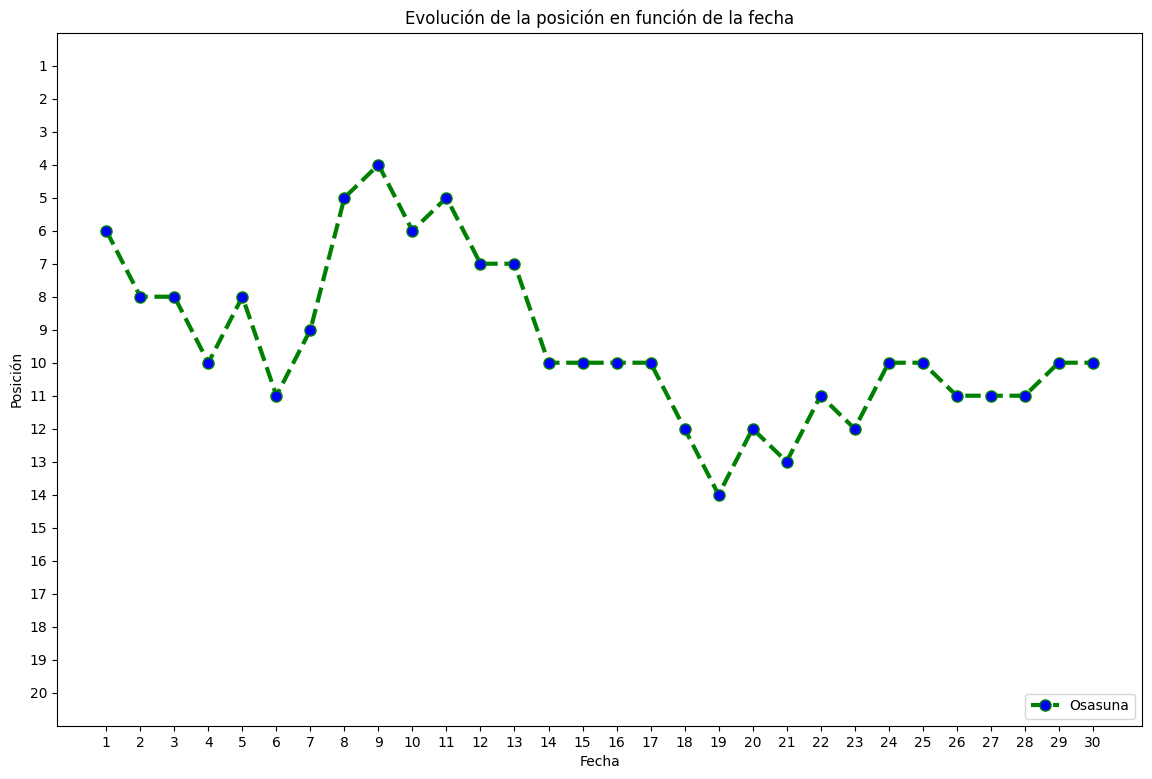

In [51]:
fig,ax = plt.subplots(figsize=(14, 9))

ax.plot(fechas[:fecha], posiciones, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=8, label = equipo)
ax.set_title('Evolución de la posición en función de la fecha')
ax.set_ylabel('Posición')
ax.set_xlabel('Fecha')
plt.legend()
plt.ylim(0,21)
plt.xticks(range(1,fecha+1,1))
plt.yticks(range(1,21,1))
ax.invert_yaxis()
plt.legend([equipo], loc='lower right')
plt.show()

Ahora Un segundo equipo para graficar

In [58]:
equipo1 = str(input('Betis'))

In [59]:
posiciones1 = []
for fec in fechas:
    pos = tabla_posicion2(ej2122,fec,equip2122,equipo1)
    posiciones1.append(pos)
    if fec == fecha:
        break

posiciones1

[8,
 17,
 12,
 12,
 12,
 13,
 14,
 14,
 14,
 15,
 16,
 17,
 18,
 18,
 17,
 16,
 17,
 17,
 18,
 16,
 15,
 15,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14]

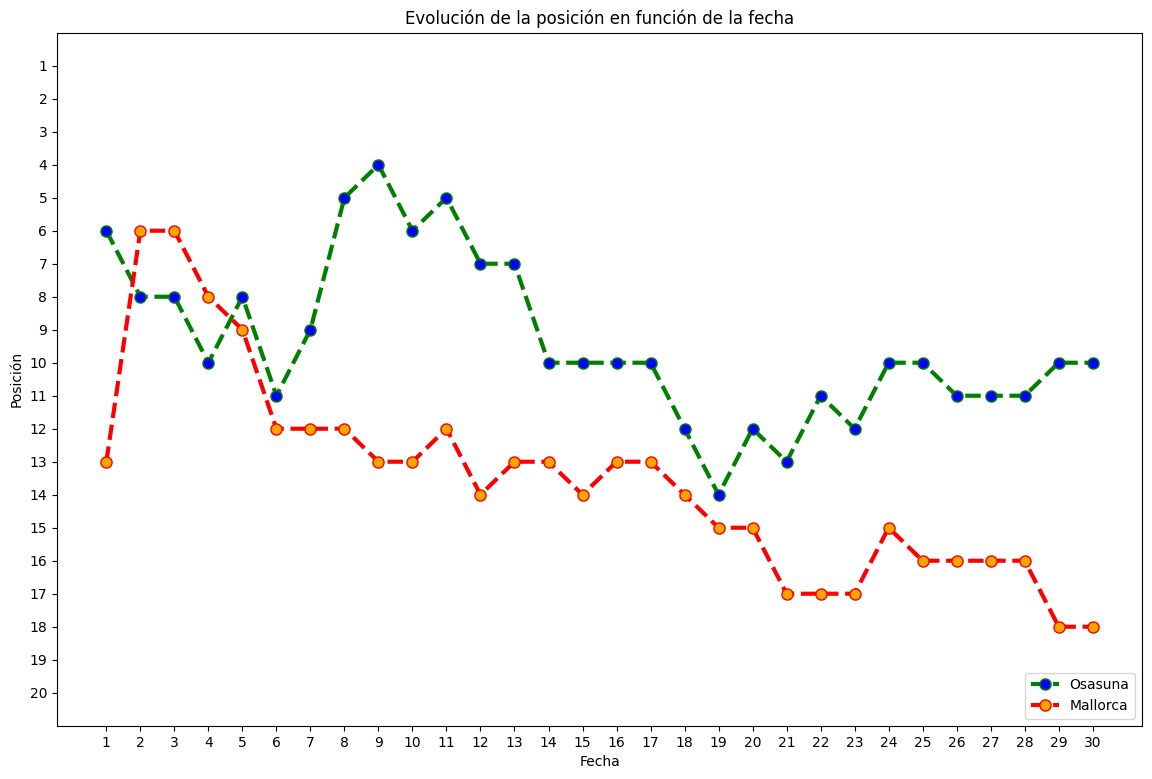

In [54]:



fig,ax = plt.subplots(figsize=(14, 9))
ax.plot(fechas[:fecha], posiciones, color='green', linestyle='dashed', linewidth = 3, marker='o',
         markerfacecolor='blue', markersize=8, label = equipo)
ax.plot(fechas[:fecha], posiciones1, color='red', linestyle='dashed', linewidth = 3, marker='o',
         markerfacecolor='orange', markersize=8, label = equipo1)
ax.set_title('Evolución de la posición en función de la fecha')
ax.set_ylabel('Posición')
ax.set_xlabel('Fecha')
plt.legend()
plt.ylim(0,21)
plt.xticks(range(1,fecha+1,1))
plt.yticks(range(1,21,1))
ax.invert_yaxis()
plt.legend([equipo,equipo1], loc='lower right')
plt.show()


In [60]:
equipo2 = str(input('Betis'))

In [61]:
posiciones2 = []
for fec in fechas:
    pos = tabla_posicion2(ej2122,fec,equip2122,equipo2)
    posiciones2.append(pos)
    if fec == fecha:
        break

posiciones2

[19,
 19,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 20,
 19,
 19,
 19,
 19,
 18,
 16,
 17,
 16,
 16,
 15,
 16,
 15,
 15,
 15,
 15,
 15,
 15]

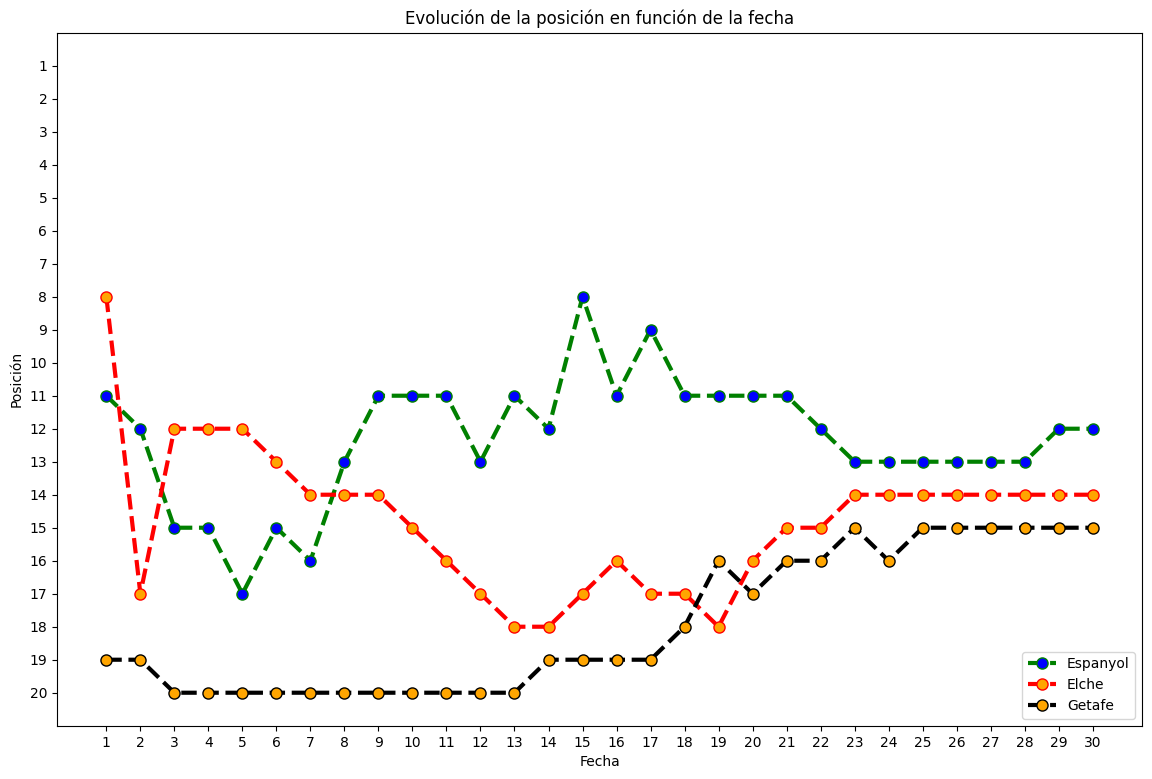

In [64]:
fig,ax = plt.subplots(figsize=(14, 9))
ax.plot(fechas[:fecha], posiciones, color='green', linestyle='dashed', linewidth = 3, marker='o',
         markerfacecolor='blue', markersize=8, label = equipo)
ax.plot(fechas[:fecha], posiciones1, color='red', linestyle='dashed', linewidth = 3, marker='o',
         markerfacecolor='orange', markersize=8, label = equipo1)
ax.plot(fechas[:fecha], posiciones2, color='black', linestyle='dashed', linewidth = 3, marker='o',
         markerfacecolor='orange', markersize=8, label = equipo2)
ax.set_title('Evolución de la posición en función de la fecha')
ax.set_ylabel('Posición')
ax.set_xlabel('Fecha')
plt.legend()
plt.ylim(0,21)
plt.xticks(range(1,fecha+1,1))
plt.yticks(range(1,21,1))
ax.invert_yaxis()
plt.legend([equipo,equipo1,equipo2], loc='lower right')
plt.show()